In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [180]:
def set_precision(t):
    tau = float(format(t, '.1f'))
    
    return tau

In [224]:
def get_freq_func(input_json):
    ttc_freq = dict()
    
    with open (input_json) as infile:
        pair_data = json.load(infile)
        
    for t in pair_data:
        # round tau
        tau = set_precision(t)
        if ttc_freq.has_key(tau):
            ttc_freq[tau] = ttc_freq[tau] + 1
        else:
            ttc_freq[tau] = 1
            
    total_pair = len(pair_data)
    print 'total pair: ', total_pair
    print 'total tau: ', len(ttc_freq)
    
    # create dataframe
    lists = sorted(ttc_freq.items()) # sorted by key, return a list of tuples
    df = pd.DataFrame(lists, columns=['tau', 'freq'])
    # normalize freq
    df['freq'] = df['freq'].apply(lambda x: x / float(total_pair))
    
    return df

total pair:  2679204
total tau:  910
Write to csv success.


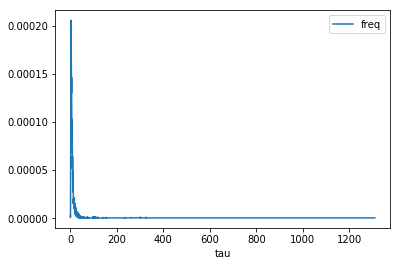

In [225]:
###### pairwise ttc values ######

pair_df = get_freq_func('pair_ttc.json')
# write pair ttc csv
pair_df.to_csv('pairwise_ttc.csv', index=False)
print "Write to csv success."

# draw pair ttc data
pair_df = pair_df.set_index('tau')
pair_df.plot( style=[])
plt.show()

total pair:  2679204
total tau:  1079
Write to csv success.


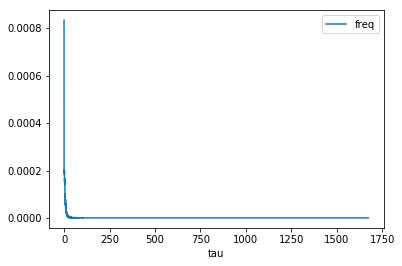

In [226]:
###### pairwise ttc scrambled values ######

pair_scramble_df = get_freq_func('pair_ttc_scramble.json')
# write pair ttc csv
pair_scramble_df.to_csv('pairwise_ttc_scrambles.csv', index=False)
print "Write to csv success."

# draw pair ttc scrambled data
pair_scramble_df = pair_scramble_df.set_index('tau')
pair_scramble_df.plot(style=[])
plt.show()

In [227]:
##### pair distribution fuction #####

pair_tau = pair_df.index.tolist()
pair_scramble_tau = pair_scramble_df.index.tolist()
pdf = dict()

tau_values = set(pair_tau + pair_scramble_tau)
for tau in tau_values:
    if tau in pair_tau and tau in pair_scramble_tau:
        pdf[tau] = pair_df.loc[tau, :].get('freq') / pair_scramble_df.loc[tau, :].get('freq')
        
pdf_lists = sorted(pdf.items()) # sorted by key, return a list of tuples
pdf_df = pd.DataFrame(pdf_lists, columns=['tau', 'g(tau)'])
# write pair ttc csv
pdf_df.to_csv('pdf.csv', index=False)
print "Write to csv success."

Write to csv success.


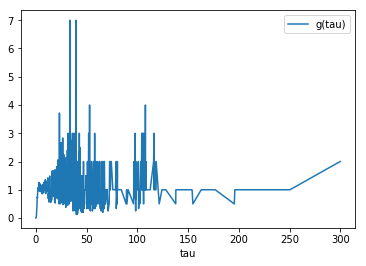

In [228]:
# draw pdf
pdf_df_by_tau = pdf_df.set_index('tau')
pdf_df_by_tau.plot(style=[])
plt.show()

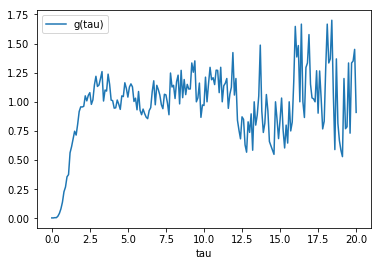

In [234]:
# crop
crop_df_pdf = pdf_df_by_tau.loc[:20, :]
crop_df_pdf.plot(style=[])
plt.show()

In [232]:
##### interaction energy #####

import math

u_df = pd.read_csv('pdf.csv')
u_df.columns = ['tau', 'energy']
u_df['energy'] = u_df['energy'].apply(lambda x: math.log(1.0 / x) if x != 0.0 else math.log(1.0 / np.finfo('float64').eps))
u_df.to_csv('energy.csv', index=False)
print "Write to csv success."

Write to csv success.


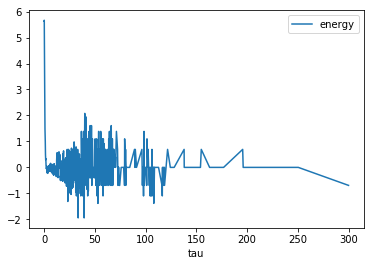

In [233]:
# draw energy
u_df = u_df.set_index('tau')
u_df.plot(style=[])
plt.show()

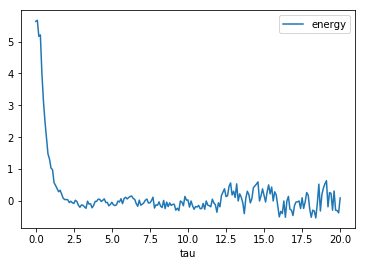

In [235]:
# crop
crop_df_u = u_df.loc[:20, :]
crop_df_u.plot(style=[])
plt.show()